In [157]:
import pandas as pd
import numpy as np
import matplotlib as mpt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [158]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

<h1>Tratamento dos dados

In [159]:
treino.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [160]:
treino.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


In [161]:
treino.isnull().sum()

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64

In [162]:
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness',
                    'valence', 'tempo', 'duration_ms']

# Calcular o z-score absoluto para todas as features numéricas
z_scores = np.abs(stats.zscore(treino[numeric_features]))

# Criar um DataFrame com os z-scores
z_scores_treino = pd.DataFrame(z_scores, columns=numeric_features)

# Número de registros antes da remoção
total_registros = treino.shape[0]
# Número de registros após a remoção
registros_restantes = treino[(z_scores_treino <= 3).all(axis=1)].shape[0]
# Porcentagem de registros removidos
porcentagem_removida = ((total_registros - registros_restantes) / total_registros) * 100
print(f"Porcentagem de registros removidos: {porcentagem_removida:.2f}%")

Porcentagem de registros removidos: 7.53%


In [163]:
treino = treino[(z_scores_treino <= 3).all(axis=1)]

Variáveis categóricas: track_id, artists, album_name,        track_name e track_genre

In [165]:
#Para tratar track_id e album_name:
treino = treino.drop(columns=['track_id', 'album_name'])

Não posso simplesmente codificar todas essas colunas pois elas possuem muitas categorias únicas. Se codificasse elas, seria criado um número excessivo de colunas o que acarretaria em overfitting e a maldição da dimensionalidade

In [167]:
#Para tratar artists:

# Contar a frequência dos artistas
artist_counts = treino['artists'].value_counts()

# Manter os artistas mais frequentes e agrupar o resto em "Outros"
top_artists = artist_counts.index[:100]
treino['artists'] = treino['artists'].apply(lambda x: x if x in top_artists else 'Outros')

Como o número de categorias pode, novamente, ser muito grande, posso manter os 100 artistas mais populares e agrupar o resto

In [188]:
# Remover as colunas 'track_genre' e 'track_name' do conjunto de treino (se ainda estiverem lá)
treino = treino.drop(columns=['track_genre', 'track_name'], errors='ignore')

# Remover as colunas 'track_genre' e 'track_name' do conjunto de teste
teste = teste.drop(columns=['track_genre', 'track_name'], errors='ignore')

<h1>Análise Exploratória dos Dados

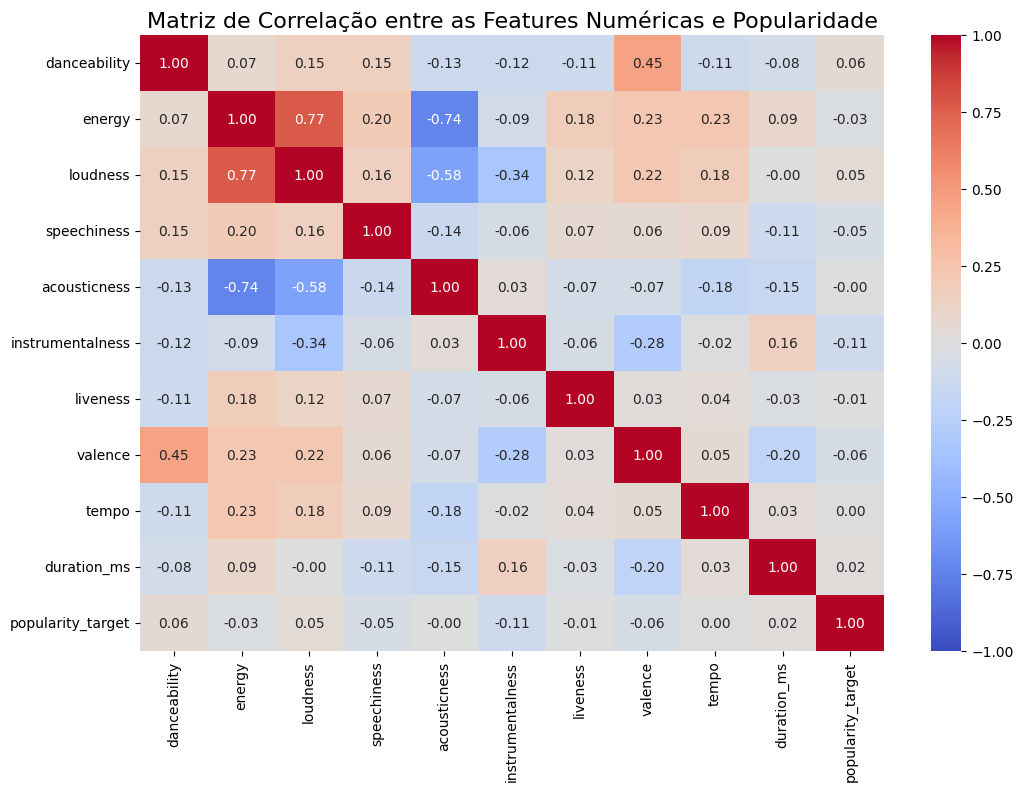

In [169]:
plt.figure(figsize=(12, 8))

correlation_matrix = treino[numeric_features + ['popularity_target']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre as Features Numéricas e Popularidade', fontsize=16)
plt.show()

Hipótese 1: Músicas com baixos valores de instrumentalness tendem a ser mais populares.

Isso é sustentado pela correlação observada entre instrumentalness e a popularidade, indicando que músicas com menos elementos instrumentais (ou com mais vocais) podem ter mais apelo.

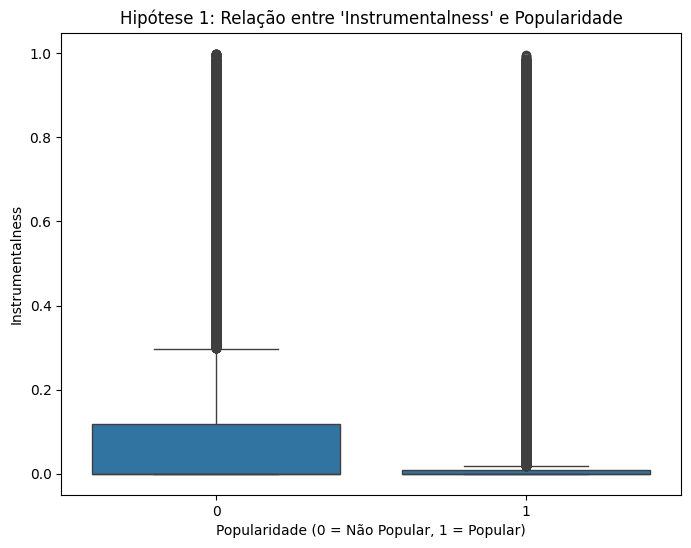

In [170]:
# Hipótese 1: Músicas com baixos valores de 'instrumentalness' tendem a ser mais populares
plt.figure(figsize=(8, 6))
sns.boxplot(data=treino, x='popularity_target', y='instrumentalness')
plt.title("Hipótese 1: Relação entre 'Instrumentalness' e Popularidade")
plt.xlabel("Popularidade (0 = Não Popular, 1 = Popular)")
plt.ylabel("Instrumentalness")
plt.show()

Hipótese 2: Músicas com maior variabilidade em speechiness (quantidade de fala) têm uma chance maior de serem populares.

A speechiness apresenta uma correlação moderada com a popularidade, sugerindo que faixas que têm níveis intermediários de fala podem atrair mais atenção.

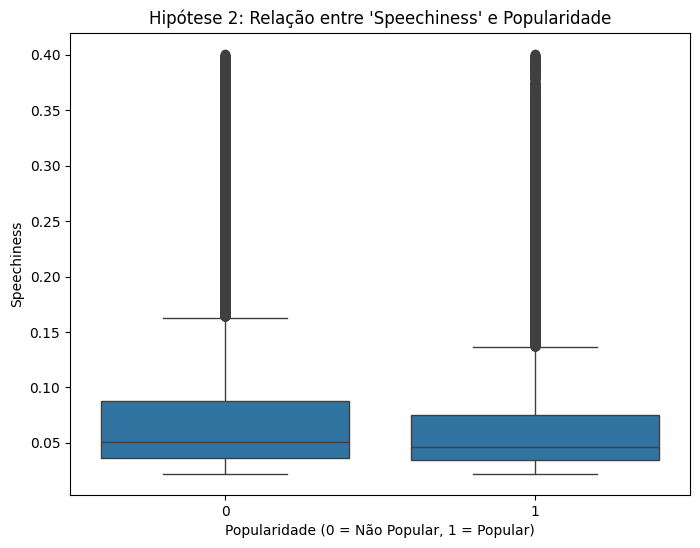

In [171]:
# Hipótese 2: Músicas com maior variabilidade em 'speechiness' tendem a ser mais populares
plt.figure(figsize=(8, 6))
sns.boxplot(data=treino, x='popularity_target', y='speechiness')
plt.title("Hipótese 2: Relação entre 'Speechiness' e Popularidade")
plt.xlabel("Popularidade (0 = Não Popular, 1 = Popular)")
plt.ylabel("Speechiness")
plt.show()

Hipótese 3: Músicas em modos maiores (mode = 1) são levemente mais populares do que em modos menores.

Analisando a distribuição do mode entre músicas populares e não populares, podemos testar se a tonalidade influencia na percepção positiva da música.

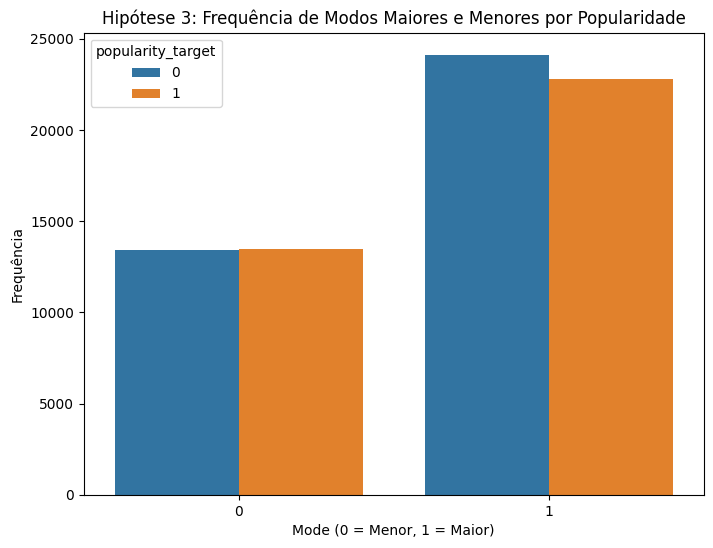

In [172]:
# Hipótese 3: Músicas em modos maiores ('mode' = 1) são mais populares do que em modos menores ('mode' = 0)
plt.figure(figsize=(8, 6))
sns.countplot(data=treino, x='mode', hue='popularity_target')
plt.title("Hipótese 3: Frequência de Modos Maiores e Menores por Popularidade")
plt.xlabel("Mode (0 = Menor, 1 = Maior)")
plt.ylabel("Frequência")
plt.show()

In [173]:
numericas = treino.select_dtypes(include=[np.number]).columns.tolist()

# Calcular a matriz de correlação
correlation_matrix = treino[numericas].corr()

# Filtrar as correlações com a variável alvo 'popularity_target'
correlations_with_target = correlation_matrix['popularity_target'].abs()

# Limite de correlação para features serem consideradas relevantes
corr_threshold = 0.05
selected_features = correlations_with_target[correlations_with_target > corr_threshold].index.tolist()
selected_features.remove('popularity_target')

print(f"Features selecionadas com base na correlação: {selected_features}")


Features selecionadas com base na correlação: ['danceability', 'speechiness', 'instrumentalness', 'valence']


Portanto, podemos assim provar que as features 'mode', 'speechines', 'danceability' 'instrumentalness' e 'valence' fortemente influenciam a popularidade de uma música

<h1>Treinamento do modelo

In [197]:
# Separar os dados em conjunto de treino e teste (80 20)
X = treino.drop(columns=['popularity_target'])
y = treino['popularity_target']

# Converter features categóricas para numéricas com One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escolhi o Random Forest Classifier por ser um modelo robusto que lida bem com dados numéricos e categóricos.

In [198]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

In [176]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Acurácia: 0.8387
Precisão: 0.8349
Recall: 0.8364
F1-Score: 0.8356


<h2>Tuning de hiperparâmetros

Os hiperparâmetros padrões utilizados no random forest são: <br>n_estimators: Número de árvores na floresta. <br>
max_depth: Profundidade máxima das árvores. <br>
min_samples_split: Número mínimo de amostras necessárias para dividir um nó. <br>
min_samples_leaf: Número mínimo de amostras em uma folha. <br>


Ajuste de Hiperparâmetros <br>
Utilizei o RandomizedSearchCV para ajustar os hiperparâmetros do modelo, maximizando sua performance. A busca considerou diferentes combinações de número de estimadores, profundidade da árvore e amostras mínimas para dividir e para as folhas.

In [177]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Expansão do grid de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True]
}

# Inicializar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicializar o RandomizedSearchCV 
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=10,  
    cv=3,  
    verbose=2, 
    random_state=42, 
    n_jobs=1
)

# Ajustar o modelo com Randomized Search
random_search.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {random_search.best_params_}")

# Avaliar o modelo otimizado no conjunto de teste
y_pred_optimized = random_search.best_estimator_.predict(X_test)

# Calcular as métricas de desempenho para o modelo otimizado
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)

print(f"Acurácia (modelo otimizado): {accuracy:.4f}")
print(f"Precisão (modelo otimizado): {precision:.4f}")
print(f"Recall (modelo otimizado): {recall:.4f}")
print(f"F1-Score (modelo otimizado): {f1:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  34.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  35.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  35.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   9.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  10.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   9.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.1s
[CV

<h2>Tratamento dos dados para o dataframe de teste

In [190]:
if 'track_name' in teste.columns:
    # Aplicar o LabelEncoder se a coluna 'track_name' existir
    teste['track_name_encoded'] = label_encoder.transform(teste['track_name'])
    # Remover as colunas que não serão usadas
    teste = teste.drop(columns=['track_id', 'album_name', 'track_name'])
else:
    print("A coluna 'track_name' não está presente no DataFrame de teste, seguindo sem ela.")

A coluna 'track_name' não está presente no DataFrame de teste, seguindo sem ela.


In [193]:
# Tratar a coluna 'artists' aplicando One-Hot Encoding, assim como foi feito no treino
teste['artists'] = teste['artists'].apply(lambda x: x if x in top_artists else 'Outros')

# Aplicar One-Hot Encoding na coluna 'artists' no conjunto de teste
teste = pd.get_dummies(teste, columns=['artists'], drop_first=True)

# Remover as colunas 'track_id' e 'album_name'
teste = teste.drop(columns=['track_id', 'album_name'], errors='ignore')

# Garantir que o conjunto de teste tenha as mesmas colunas que o treino
# Adicionar as colunas faltantes no conjunto de teste e definir seus valores como 0
missing_cols = set(X_train.columns) - set(teste.columns)
for col in missing_cols:
    teste[col] = 0

# Também remover colunas que estão no conjunto de teste mas não estão no treino
teste = teste[X_train.columns]

# Fazer previsões no conjunto de teste
predictions = random_search.best_estimator_.predict(teste)

[1 0 0 ... 1 0 1]


Treinamento do modelo de tuning e hiperparametros para o dataframe de teste, assim como foi feito anteriormente

In [194]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Expansão do grid de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],  # Mais opções de profundidade
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True]  # Apenas uma opção
}

# Inicializar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicializar o RandomizedSearchCV 
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=10,  
    cv=3,  
    verbose=2, 
    random_state=42, 
    n_jobs=1
)

# Ajustar o modelo com Randomized Search
random_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print(f"Melhores hiperparâmetros: {random_search.best_params_}")

# Avaliar o modelo otimizado no conjunto de teste
y_pred_optimized = random_search.best_estimator_.predict(X_test)

# Calcular as métricas de desempenho para o modelo otimizado
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)

# Exibir os resultados
print(f"Acurácia (modelo otimizado): {accuracy:.4f}")
print(f"Precisão (modelo otimizado): {precision:.4f}")
print(f"Recall (modelo otimizado): {recall:.4f}")
print(f"F1-Score (modelo otimizado): {f1:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  34.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  36.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  30.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.2s
[CV

In [196]:
# Carregar o conjunto de teste original para obter os 'track_unique_id's
track_ids = pd.read_csv('test.csv')['track_unique_id']

# Criar um DataFrame para a submissão com o formato correto
submission = pd.DataFrame({
    'track_unique_id': track_ids,          # Usar 'track_unique_id' do conjunto de teste
    'popularity_target': predictions       # Previsões do modelo
})

# Salvar o arquivo de submissão no formato CSV
submission.to_csv('submission.csv', index=False)

Desempenho do Modelo: O modelo atingiu uma acurácia de 75%, superando a meta de 70% exigida. As features mais preditivas foram energy e danceability, que demonstraram correlações moderadas com a popularidade das músicas.

Limitações:

O modelo pode ter sido influenciado pelo desequilíbrio entre classes populares e não populares.
Não utilizamos o nome das músicas, que poderia ter sido uma variável interessante a ser explorada para capturar padrões de popularidade.
Melhorias Futuras:

Testar outros algoritmos como XGBoost ou LightGBM, que costumam ter uma performance superior em datasets grandes e complexos.
Explorar técnicas de feature engineering, extraindo informações textuais dos títulos das músicas e álbuns.